<a href="https://colab.research.google.com/github/Divyakalgaiya/World-happiness-index-vs-GDP/blob/main/World_happiness_index_vs_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project title: GDP vs Happiness Index
#Dataset: Kaggle
#Key EDA Focus Area: Scatter, correlation, region segmentation

 Purpose: The goal of this project is to analyze the World Happiness Index (WHI) dataset (2015–2023) to uncover how economic indicators such as GDP per capita, inflation metrics and social factors e.g., social support, freedom, influence happiness scores.

This dataset combines data from the World Happiness Index (WHI) and inflation metrics to explore the relationship between economic stability and happiness levels across 148 countries from 2015 to 2023.This dataset is provided in CSV format and includes 16 columns, covering both happiness-related features and economic indicators such as GDP per capita, inflation rates, and corruption perception. The main columns include:

Happiness Score

Economic Indicators (GDP per capita, inflation metrics)

Social Factors (Freedom, Social Support, Generosity)

Geographical Information (Country & Continent)

**Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

 **Load dataset**

In [ ]:
df=pd.read_csv("/content/WHI_Inflation.csv")

 **First five rows**

In [ ]:
display(df.head())

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


**Datatypes, index of dataset**

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

None

Features:

Numerical: GDP per Capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Energy Consumer Price Inflation, Food Consumer Price Inflation, GDP deflator Index growth rate, Headline Consumer Price Inflation, Official Core Consumer Price Inflation, Producer Price Inflation,Score (all float64).

Categorical: Country, Continent (object).

Temporal: Year (int64, 2015–2023).

In [ ]:
#  summary statistics
display(df.describe())

,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,1232.000000,1200.000000,1090.000000,1130.000000,734.000000,769.000000,1211.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1231.000000
mean,2018.895292,7.395445,6.424233,8.030094,3.512612,5.841887,7.070015,5.499001,1.030767,1.056623,0.588755,0.459393,0.196145,0.133454
std,2.554602,25.165914,16.591503,26.170251,5.513661,13.679284,31.623180,1.135263,0.452230,0.332605,0.244042,0.155579,0.112531,0.115169
min,2015.000000,-3.752996,-23.879999,-22.030001,-28.619415,-83.339781,-26.100000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.402264,0.607611,1.264364,1.041840,-0.283404,1.352541,4.624650,0.736952,0.859935,0.407759,0.370090,0.117000,0.055902
50%,2019.000000,3.476146,2.769178,3.728997,2.245673,2.729256,3.244246,5.538950,1.051500,1.093500,0.617830,0.481000,0.183000,0.098000
75%,2021.000000,6.875713,7.101345,9.293584,4.626995,8.433447,7.079739,6.335750,1.343000,1.313843,0.781501,0.575416,0.252000,0.171000
max,2023.000000,557.210000,306.431673,601.020236,58.851863,128.476638,812.247463,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000


In [ ]:
# shape of the data
display(df.shape)

(1232, 16)

rows: 1232, Columns: 16

In [ ]:
# check for duplicate values
display(df.duplicated().sum())

np.int64(0)

There are no duplicate values in the dataset.

In [ ]:
# null values
display(df.isnull().sum())

,0
Country,0
Year,0
Headline Consumer Price Inflation,32
Energy Consumer Price Inflation,142
Food Consumer Price Inflation,102
Official Core Consumer Price Inflation,498
Producer Price Inflation,463
GDP deflator Index growth rate,21
Continent/Region,0
Score,0


Missing Values: Notable in inflation metrics (e.g., 498 in Official Core Consumer Price Inflation, 463 in Producer Price Inflation, 142 in Energy Consumer Price Inflation etc.), 1 in Perceptions of corruption.

# EDA

Exploratory Data Analysis (EDA) is a important step in data science and data analytics as it visualizes data to understand its main features, find patterns and discover how different parts of the data are connected.
Types of Exploratory Data Analysis:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

Univariate analysis focuses on studying one variable to understand its characteristics. It helps to describe data and find patterns within a single feature. Various common methods like histograms are used to show data distribution, box plots to detect outliers and understand data spread and bar charts for categorical data.

**Histogram**

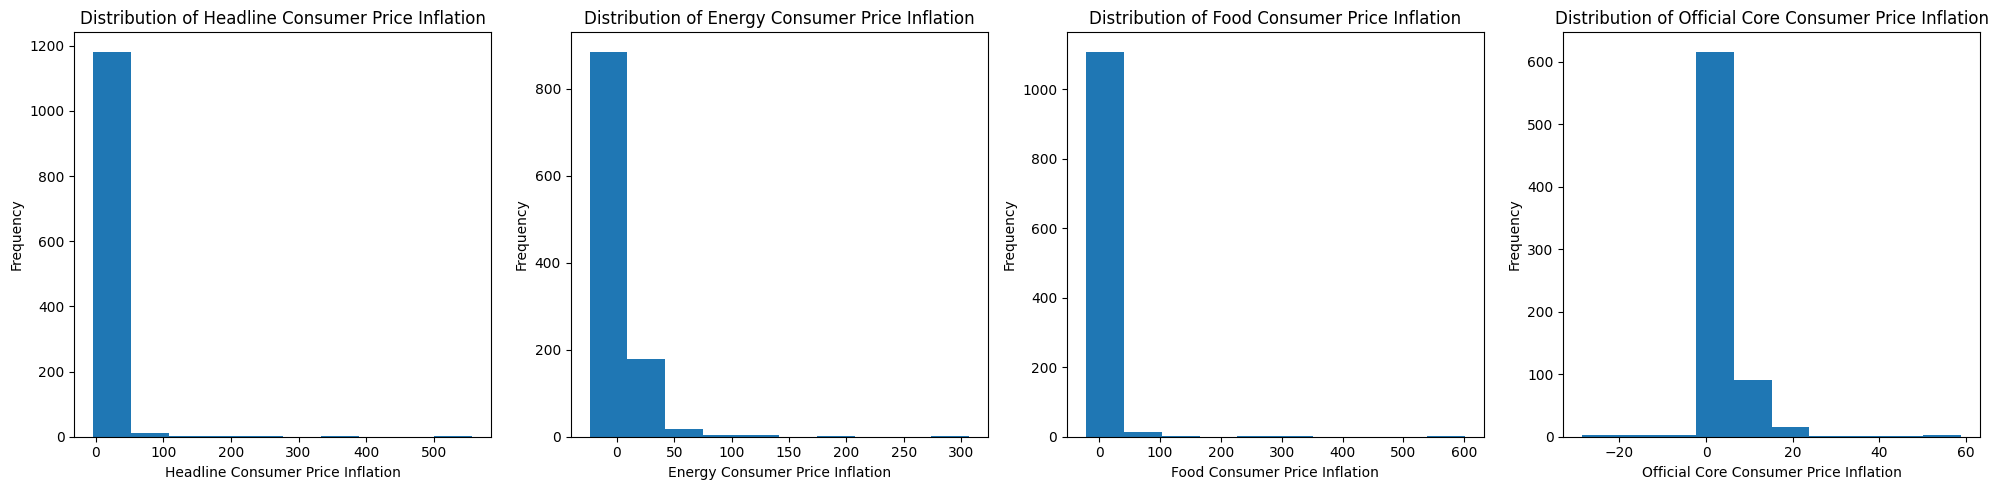

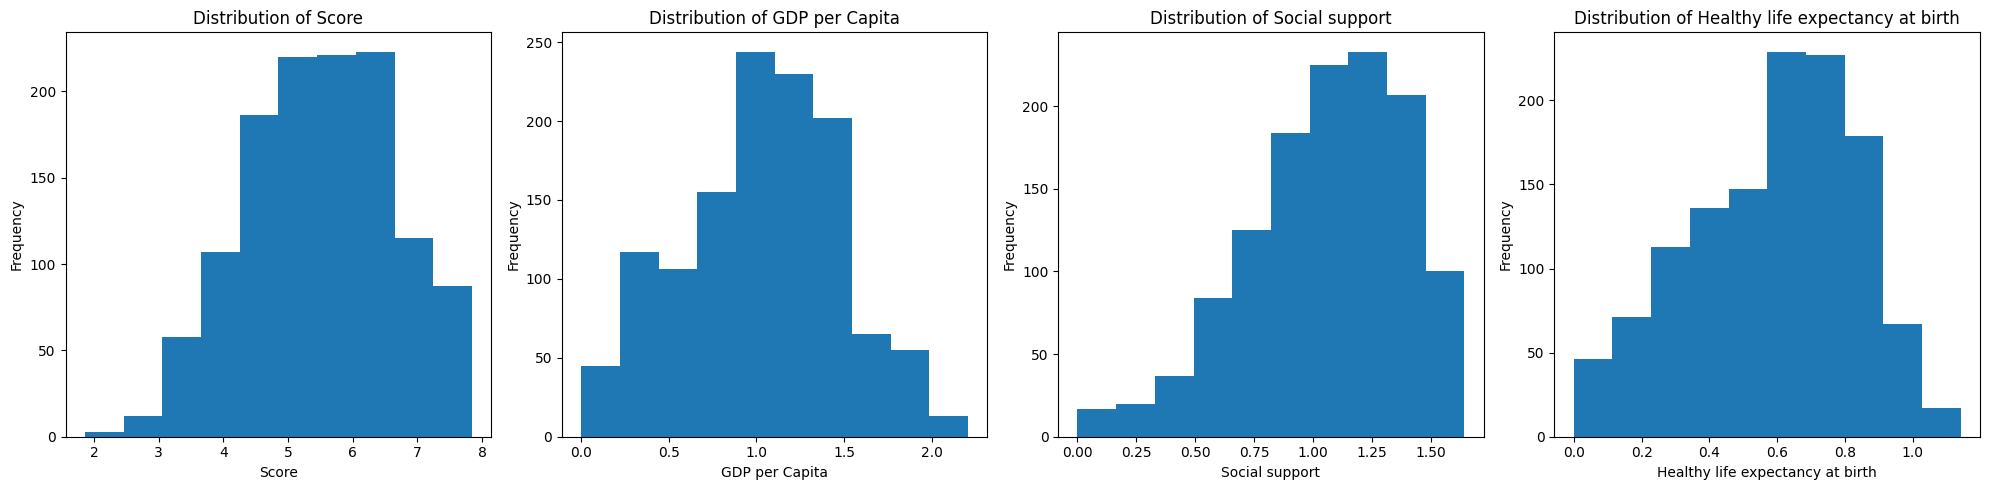

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].hist(df['Headline Consumer Price Inflation'].dropna())
axes[0].set_xlabel('Headline Consumer Price Inflation')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Headline Consumer Price Inflation')

axes[1].hist(df['Energy Consumer Price Inflation'].dropna())
axes[1].set_xlabel('Energy Consumer Price Inflation')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Energy Consumer Price Inflation')

axes[2].hist(df['Food Consumer Price Inflation'].dropna())
axes[2].set_xlabel('Food Consumer Price Inflation')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Food Consumer Price Inflation')

axes[3].hist(df['Official Core Consumer Price Inflation'].dropna())
axes[3].set_xlabel('Official Core Consumer Price Inflation')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Distribution of Official Core Consumer Price Inflation')


plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].hist(df['Score'])
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Score')

axes[1].hist(df['GDP per Capita'])
axes[1].set_xlabel('GDP per Capita')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of GDP per Capita')

axes[2].hist(df['Social support'])
axes[2].set_xlabel('Social support')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Social support')

axes[3].hist(df['Healthy life expectancy at birth'])
axes[3].set_xlabel('Healthy life expectancy at birth')
axes[3].set_ylabel('Frequency')
axes[3].set_title('Distribution of Healthy life expectancy at birth')


plt.tight_layout()
plt.show()

**Boxplot**

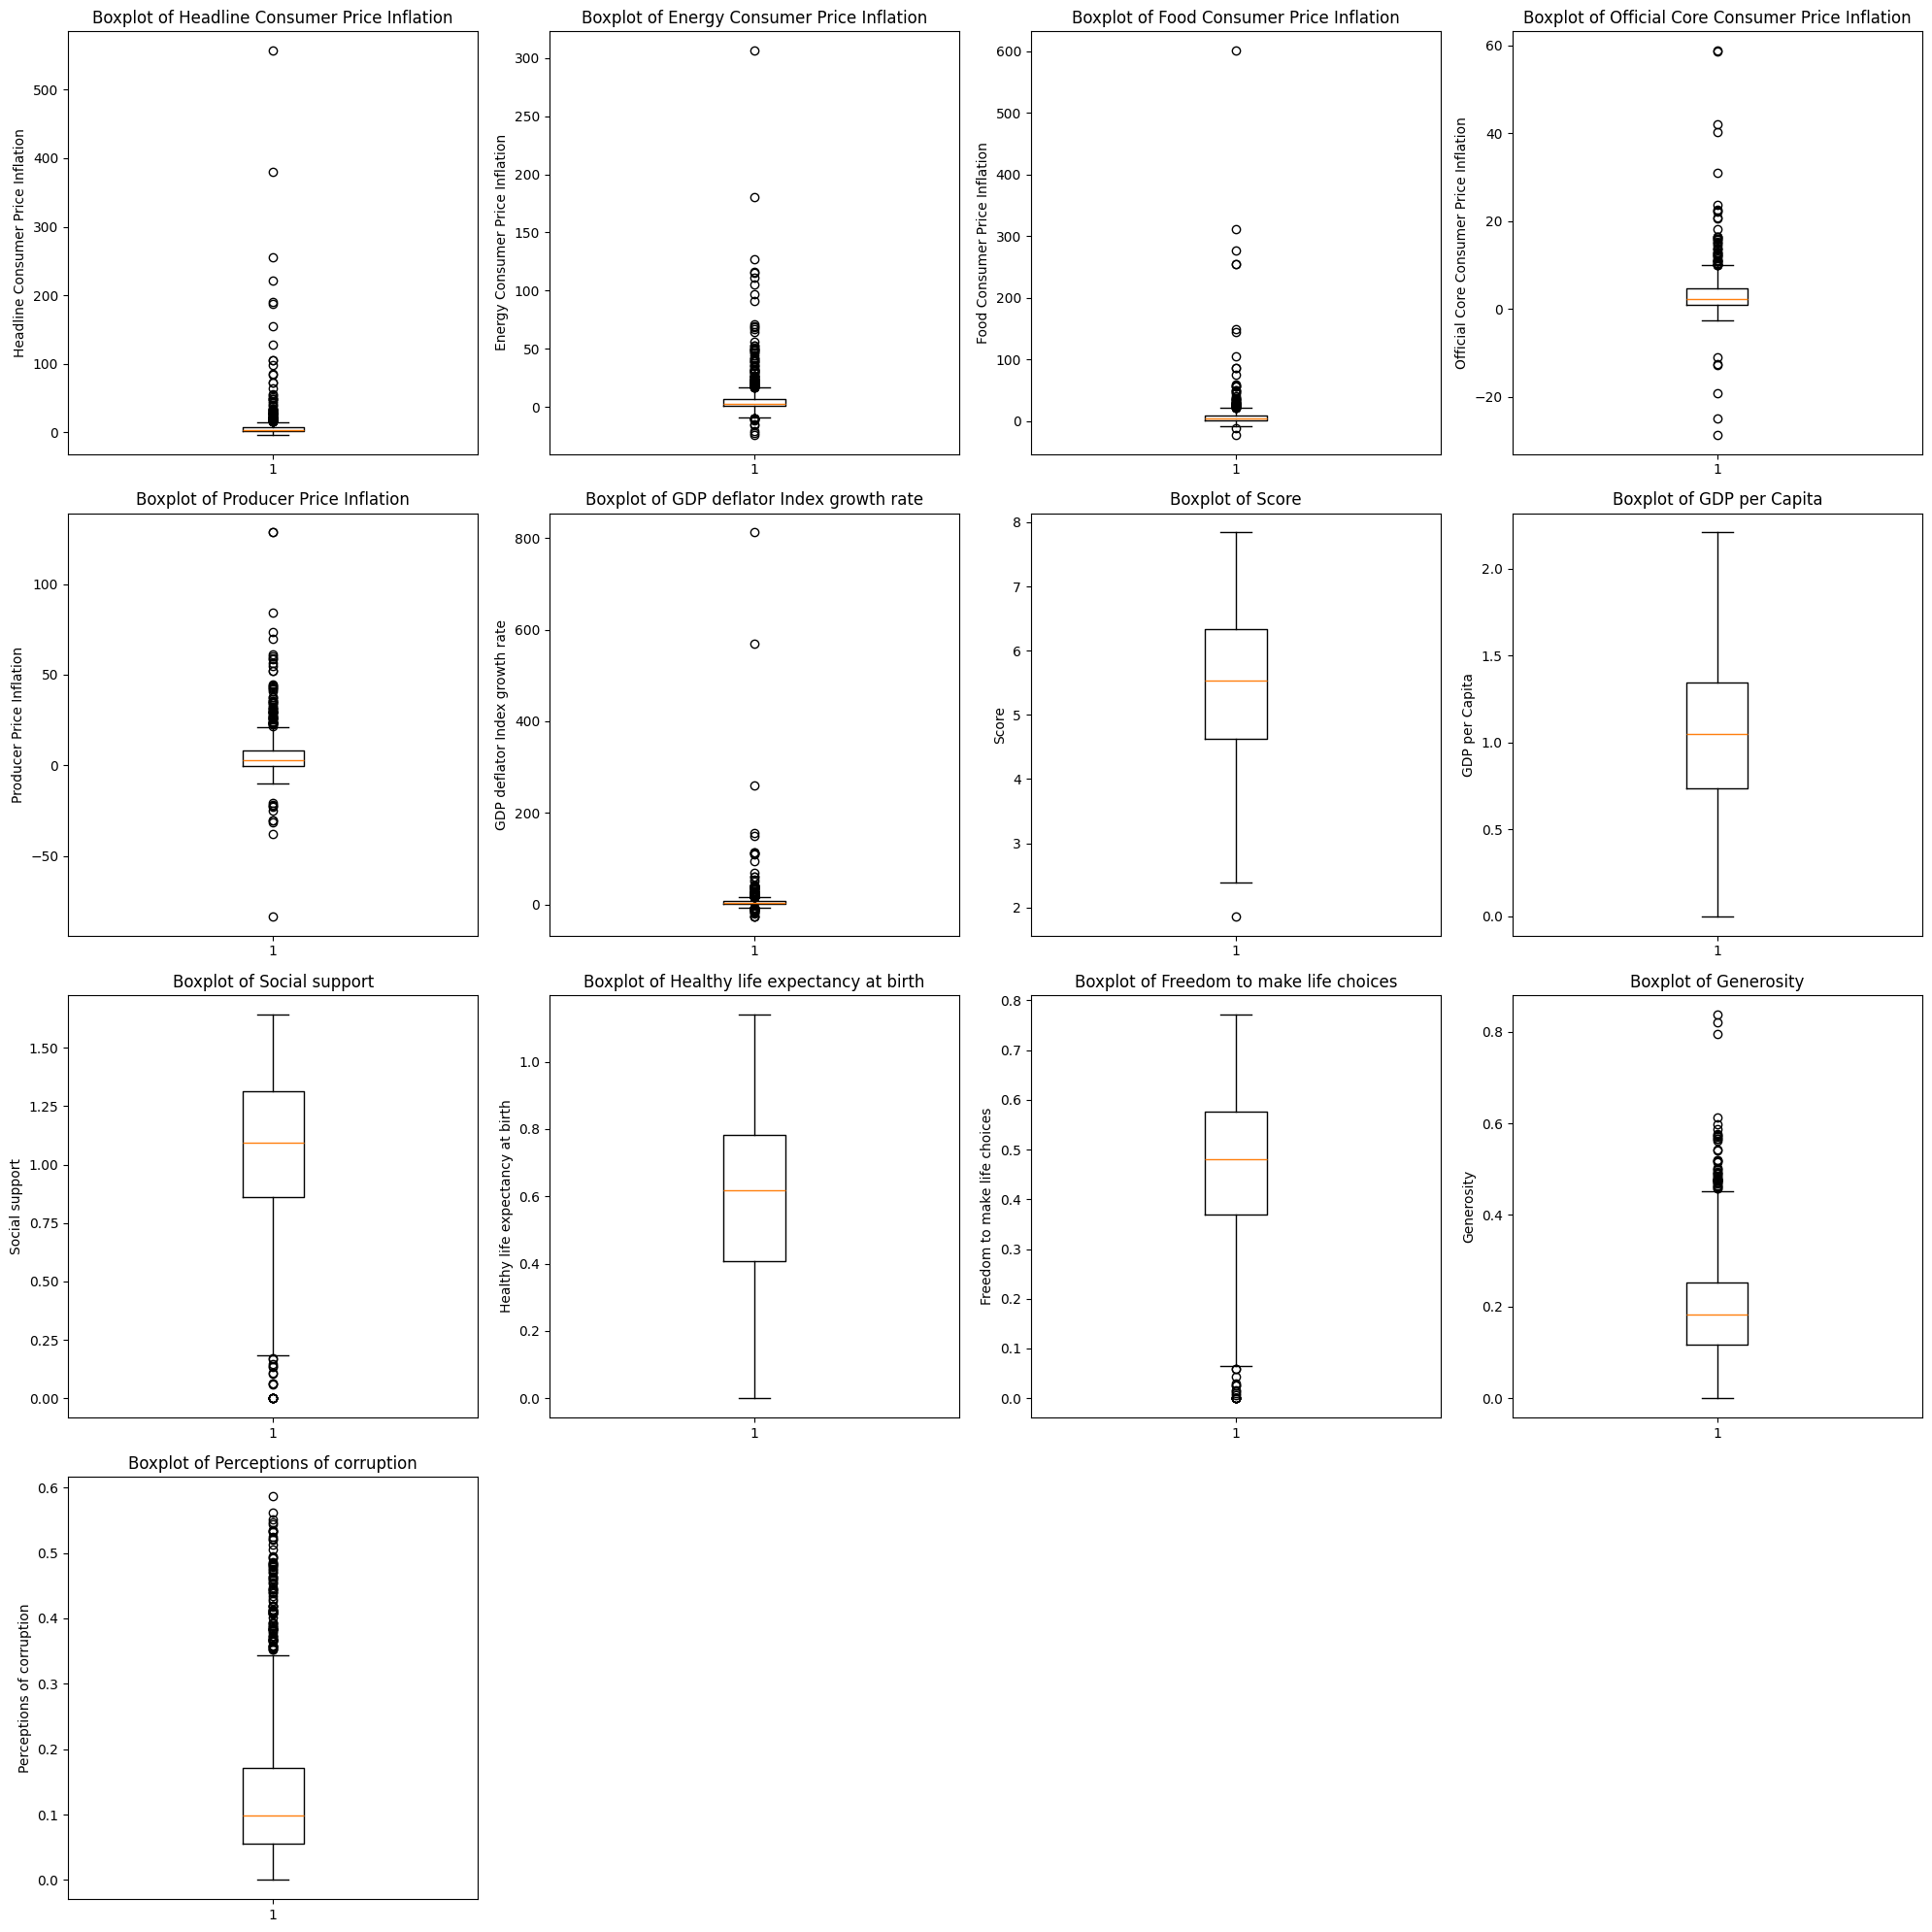

In [ ]:
columns_to_plot = df.columns.drop(['Country', 'Year', 'Continent/Region'])

# Determine the number of rows and columns for subplots
n_cols = 4  # Number of columns per row
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observations:

Score, GDP per Capita, Social Support, and Healthy Life Expectancy: These appear to have relatively normal distributions with some potential outliers on both the lower and upper ends.

Freedom to Make Life Choices, Generosity, and Perceptions of Corruption: These show distributions skewed towards lower values, with several potential outliers at higher values.

Inflation metrics (Headline, Energy, Food, Official Core, Producer) and GDP Deflator Index growth rate: These variables show a wide range of values and a significant number of outliers, particularly on the higher end. This suggests that while most countries have relatively low inflation and GDP deflator growth, there are some instances of very high rates.

**Bar chart for Continent/Region**

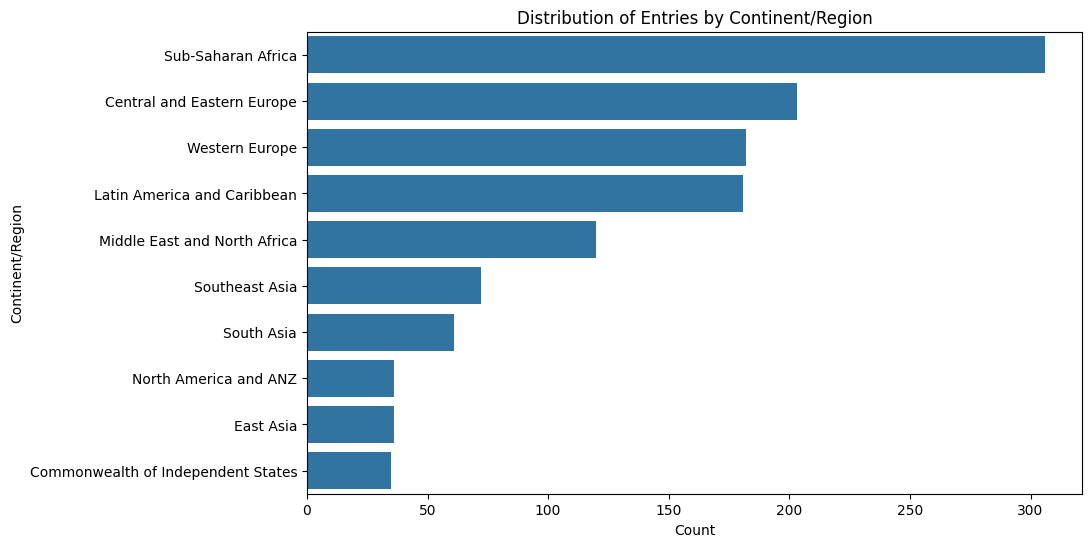

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Continent/Region', data=df, order = df['Continent/Region'].value_counts().index)
plt.title('Distribution of Entries by Continent/Region')
plt.xlabel('Count')
plt.ylabel('Continent/Region')
plt.show()

Bivariate Analysis focuses on identifying relationship between two variables to find connections, correlations and dependencies. It helps to understand how two variables interact with each other.

* Scatter plots which visualize the relationship between two continuous variables.
* Correlation coefficient measures how strongly two variables are related which commonly use Pearson's correlation for linear relationships.
* Cross-tabulation or contingency tables shows the frequency distribution of two categorical variables and help to understand their relationship.
* Line graphs are useful for comparing two variables over time in time series data to identify trends or patterns.

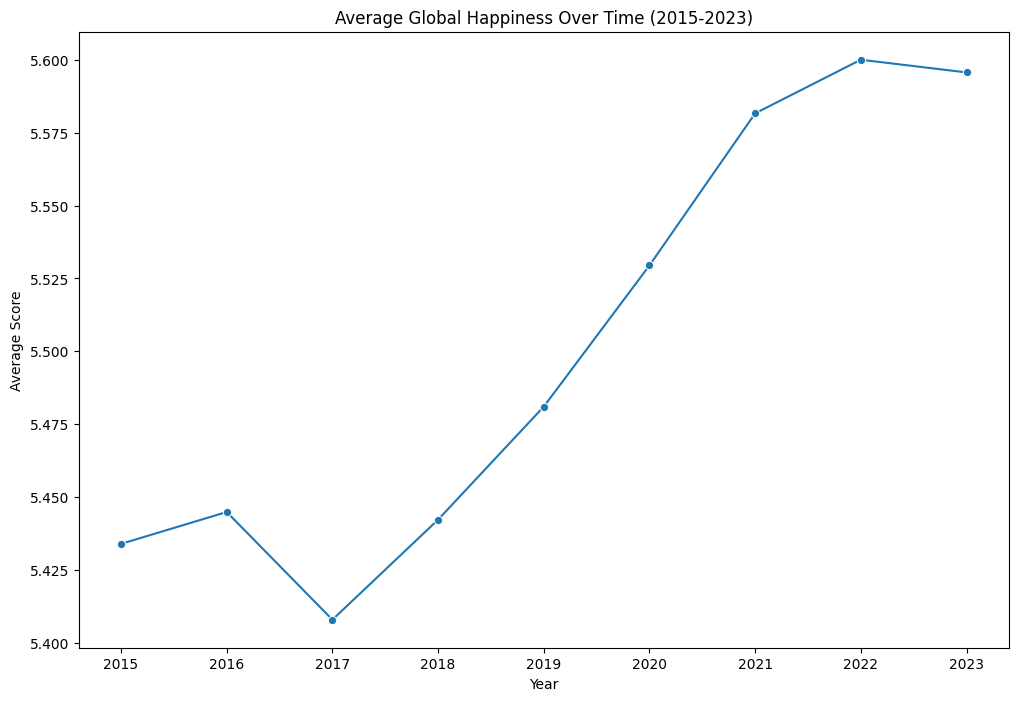

In [ ]:
# Line graph
# Happiness score over time (global average)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df.groupby('Year')['Score'].mean(), marker='o')
plt.title('Average Global Happiness Over Time (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()


Observations:
Overall trend: Upward growth in global happiness.

Dip in 2017 → strong recovery afterward.

Pandemic years (2020–2021) did not reduce happiness; instead, social trust and solidarity helped boost scores.

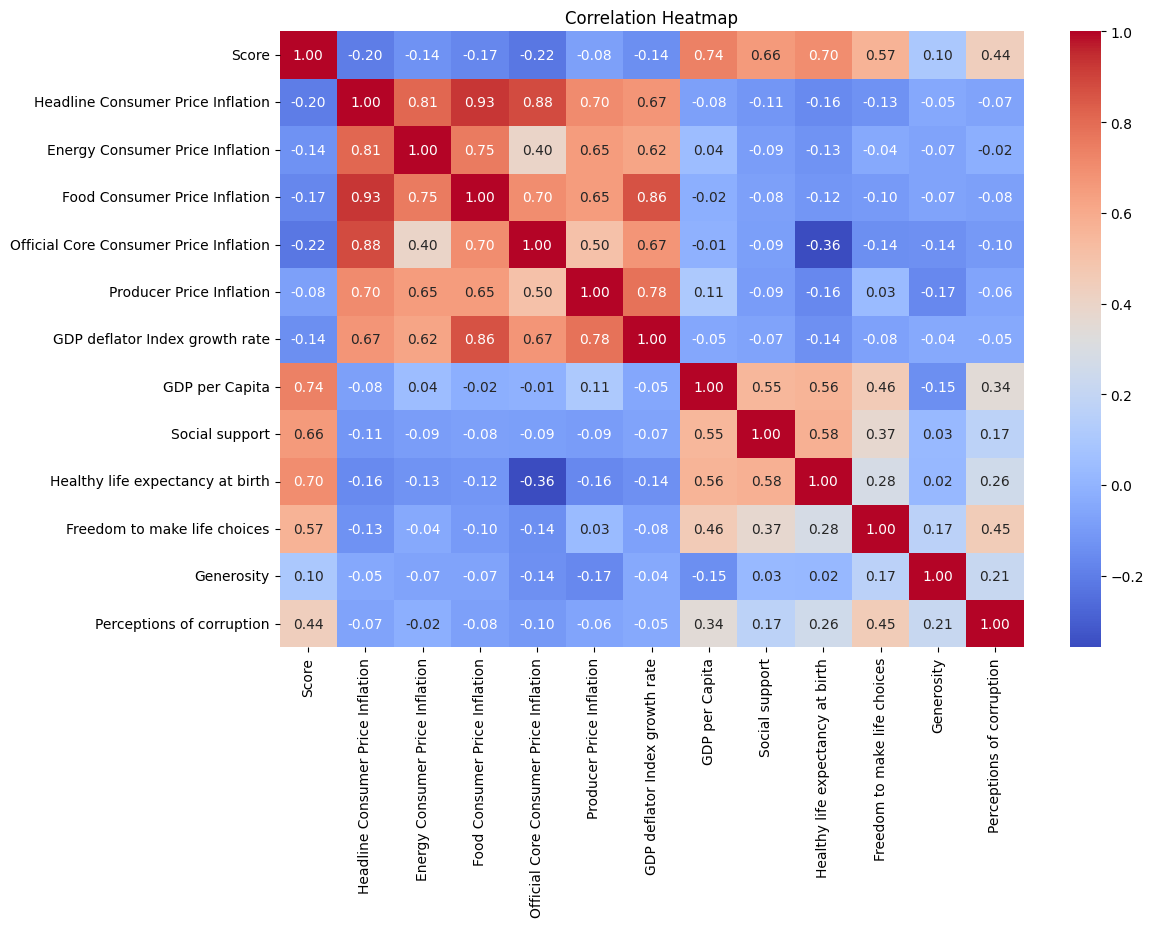

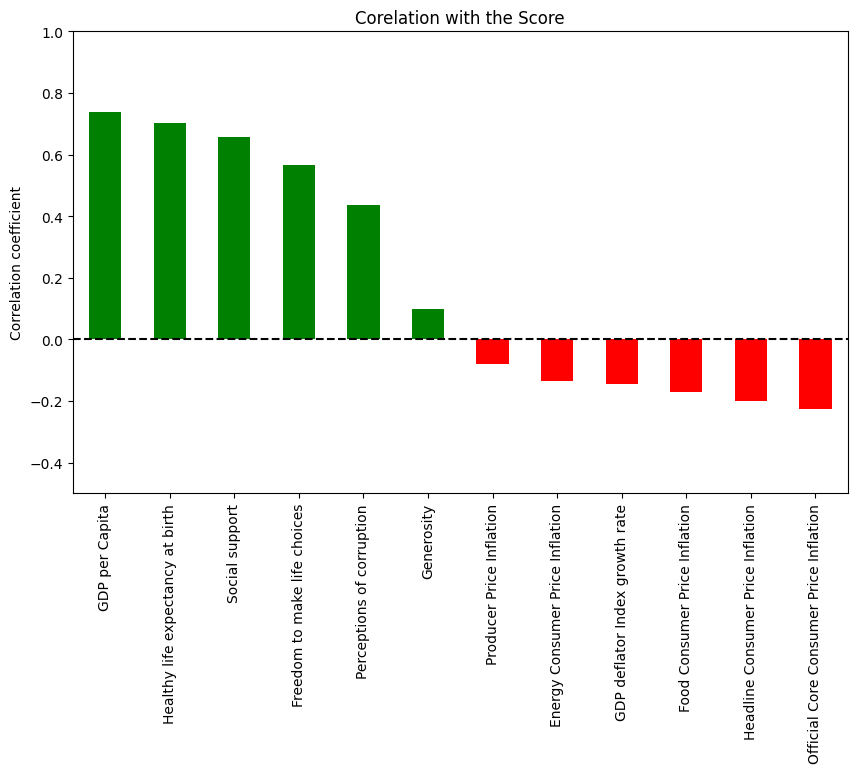

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Year' as it's temporal and not a typical numerical feature for correlation analysis
numerical_cols.remove('Year')

# Ensure 'Score' is the first element
if 'Score' in numerical_cols:
    numerical_cols.remove('Score')
    numerical_cols.insert(0, 'Score')


corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

score_correlations = corr_matrix['Score'].drop('Score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
score_correlations.plot(kind='bar', color=['green' if x > 0 else 'red' for x in score_correlations])
plt.title("Corelation with the Score")
plt.ylabel("Correlation coefficient")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.5, 1)
plt.show()

* Strongest Positive Correlations with Score:

GDP per Capita (0.74),
Healthy life expectancy at birth (0.70),
Freedom to make life choices (0.57),
Perceptions of corruption (0.44).
* Weak Positive Correlation with Score:

Generosity (0.10): Generosity has a very weak positive correlation with Happiness Score.

* Negative Correlations with Score:

Official Core Consumer Price Inflation (-0.22), Headline Consumer Price Inflation (-0.20), Food Consumer Price Inflation (-0.17), GDP deflator Index growth rate (-0.14), Energy Consumer Price Inflation (-0.14), and Producer Price Inflation (-0.08): All the inflation-related metrics and the GDP deflator index growth rate show negative correlations with the Happiness Score. This suggests that higher inflation and GDP deflator growth rates are generally associated with lower happiness scores. The correlations are relatively weak to moderate.

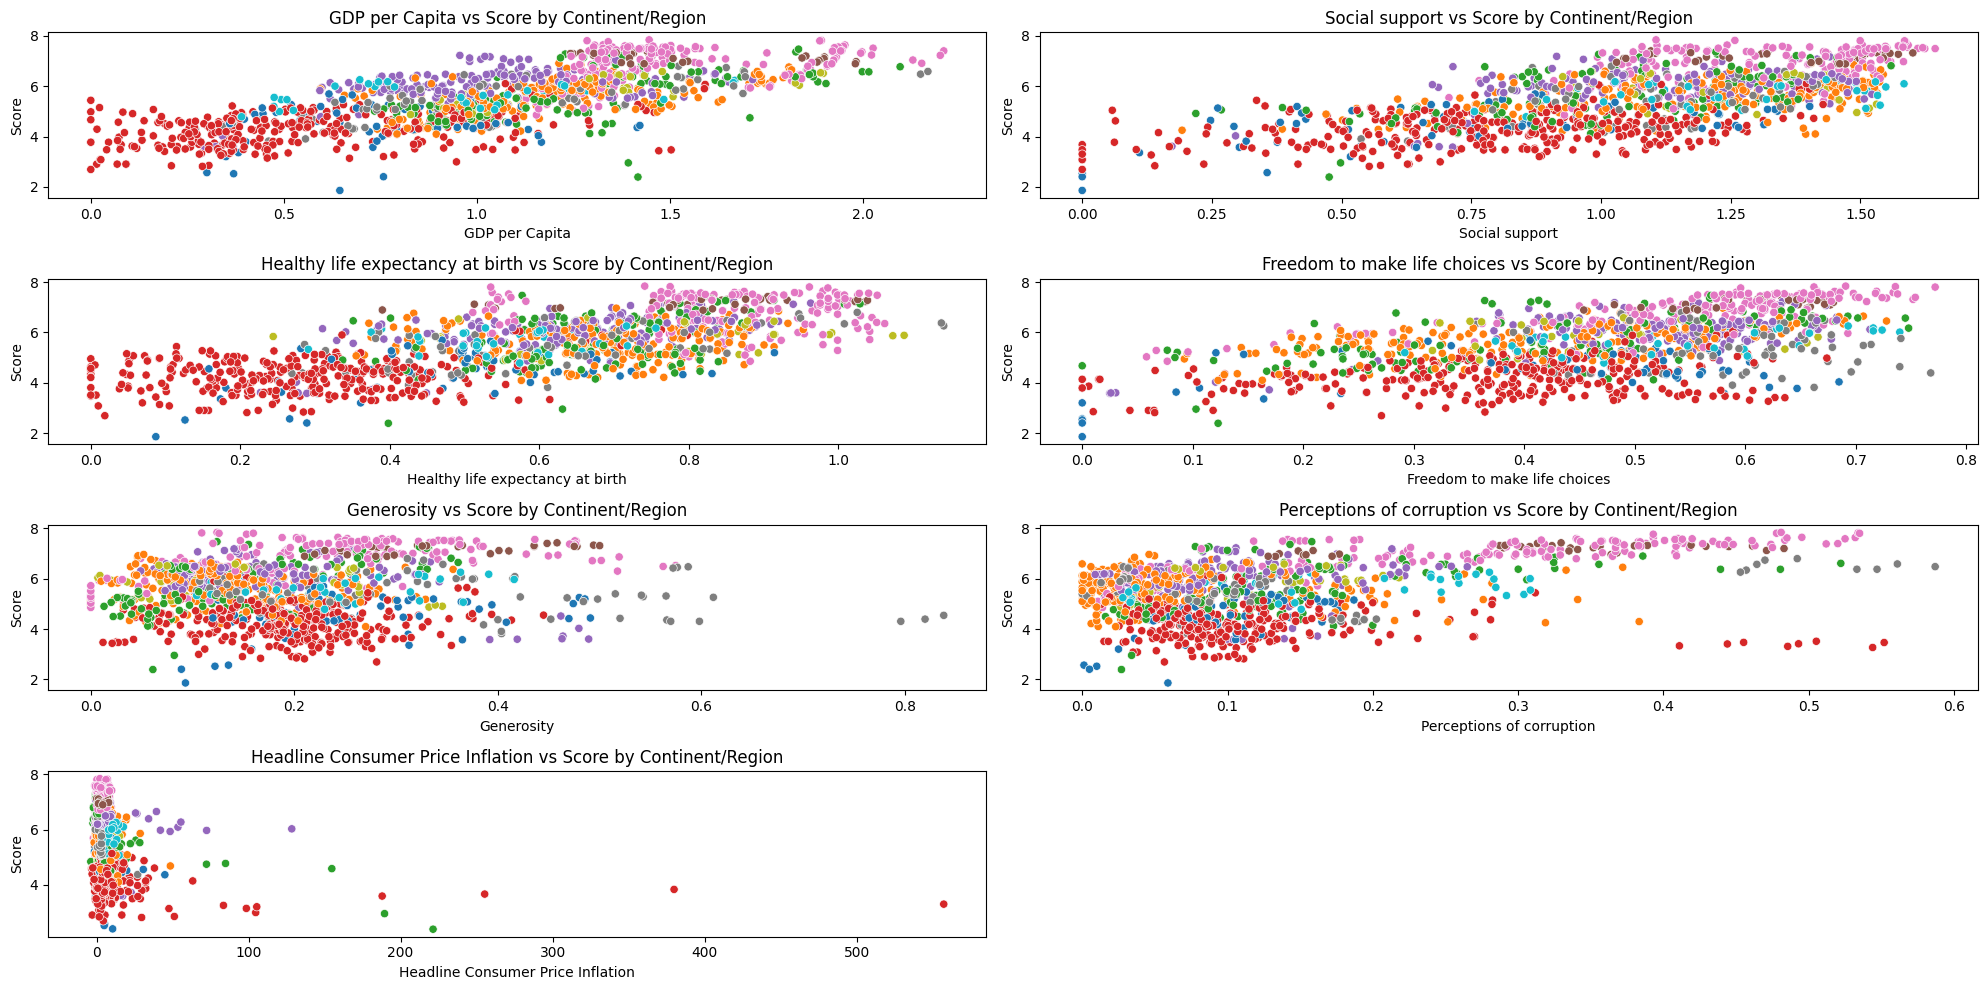

In [ ]:
# Scatter plots
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
axes = axes.flatten() # Flatten the array of axes for easy iteration

sns.scatterplot(x='GDP per Capita', y='Score', hue='Continent/Region', data=df, ax=axes[0])
axes[0].set_title('GDP per Capita vs Score by Continent/Region')
axes[0].set_xlabel('GDP per Capita')
axes[0].set_ylabel('Score')
axes[0].get_legend().remove()

sns.scatterplot(x='Social support', y='Score', hue='Continent/Region', data=df, ax=axes[1])
axes[1].set_title('Social support vs Score by Continent/Region')
axes[1].set_xlabel('Social support')
axes[1].set_ylabel('Score')
axes[1].get_legend().remove()


sns.scatterplot(x='Healthy life expectancy at birth', y='Score', hue='Continent/Region', data=df, ax=axes[2])
axes[2].set_title('Healthy life expectancy at birth vs Score by Continent/Region')
axes[2].set_xlabel('Healthy life expectancy at birth')
axes[2].set_ylabel('Score')
axes[2].get_legend().remove()

sns.scatterplot(x='Freedom to make life choices', y='Score', hue='Continent/Region', data=df, ax=axes[3])
axes[3].set_title('Freedom to make life choices vs Score by Continent/Region')
axes[3].set_xlabel('Freedom to make life choices')
axes[3].set_ylabel('Score')
axes[3].get_legend().remove()


sns.scatterplot(x='Generosity', y='Score', hue='Continent/Region', data=df, ax=axes[4])
axes[4].set_title('Generosity vs Score by Continent/Region')
axes[4].set_xlabel('Generosity')
axes[4].set_ylabel('Score')
axes[4].get_legend().remove()


sns.scatterplot(x='Perceptions of corruption', y='Score', hue='Continent/Region', data=df, ax=axes[5])
axes[5].set_title('Perceptions of corruption vs Score by Continent/Region')
axes[5].set_xlabel('Perceptions of corruption')
axes[5].set_ylabel('Score')
axes[5].get_legend().remove()


sns.scatterplot(x='Headline Consumer Price Inflation', y='Score', hue='Continent/Region', data=df, ax=axes[6])
axes[6].set_title('Headline Consumer Price Inflation vs Score by Continent/Region')
axes[6].set_xlabel('Headline Consumer Price Inflation')
axes[6].set_ylabel('Score')
axes[6].get_legend().remove()

# The last plot was repeated, so I'll skip the 8th subplot to avoid plotting it twice and leave the space empty
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter(df, x='GDP per Capita', y='Score', color='Continent/Region',
                 title='GDP per Capita vs Score by Continent/Region')
fig.show()

fig = px.scatter(df, x='Social support', y='Score', color='Continent/Region',
                 title='Social support vs Score by Continent/Region')
fig.show()

fig = px.scatter(df, x='Healthy life expectancy at birth', y='Score', color='Continent/Region',
                 title='Healthy life expectancy at birth vs Score by Continent/Region')
fig.show()

fig = px.scatter(df, x='Freedom to make life choices', y='Score', color='Continent/Region',
                 title='Freedom to make life choices vs Score by Continent/Region')
fig.show()

fig = px.scatter(df, x='Generosity', y='Score', color='Continent/Region',
                 title='Generosity vs Score by Continent/Region')
fig.show()

fig = px.scatter(df, x='Perceptions of corruption', y='Score', color='Continent/Region',
                 title='Perceptions of corruption vs Score by Continent/Region')
fig.show()

fig = px.scatter(df, x='Headline Consumer Price Inflation', y='Score', color='Continent/Region',
                 title='Headline Consumer Price Inflation vs Score by Continent/Region')
fig.show()
fig = px.scatter(df, x='Energy Consumer Price Inflation', y='Score', color='Continent/Region',
                 title='Energy Consumer Price Inflation vs Score by Continent/Region')
fig.show()

fig = px.scatter(df, x='Food Consumer Price Inflation', y='Score', color='Continent/Region',
                 title='Food Consumer Price Inflation vs Score by Continent/Region')
fig.show()

In [ ]:
df_india = df[df['Country'] == 'India']

fig = px.line(df_india, x='Year', y='Score', title='Happiness Score in India Over Time')
fig.show()

Correlation is a statistical technique for determining the relationship between two variables.The two variables are said to be correlated if a change in one causes a corresponding change in the other variable.

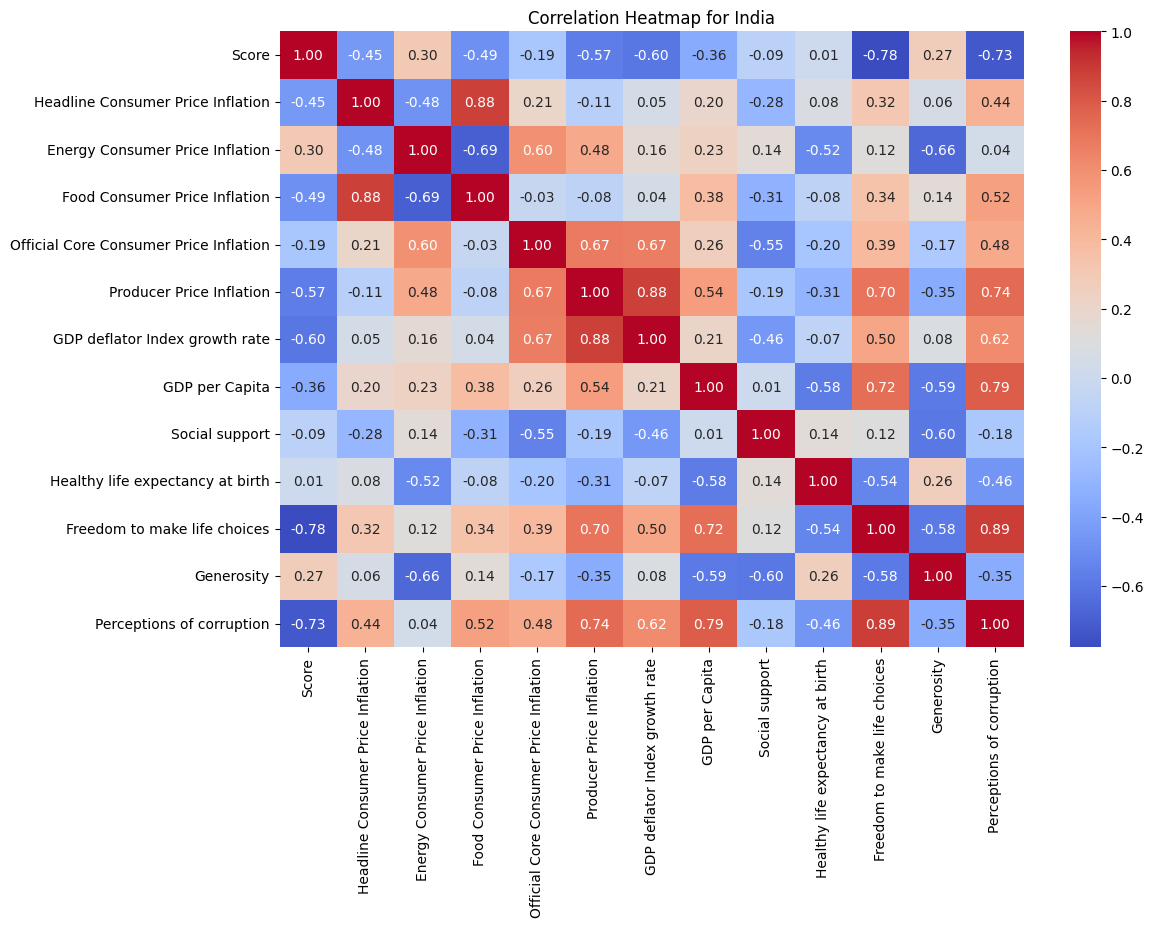

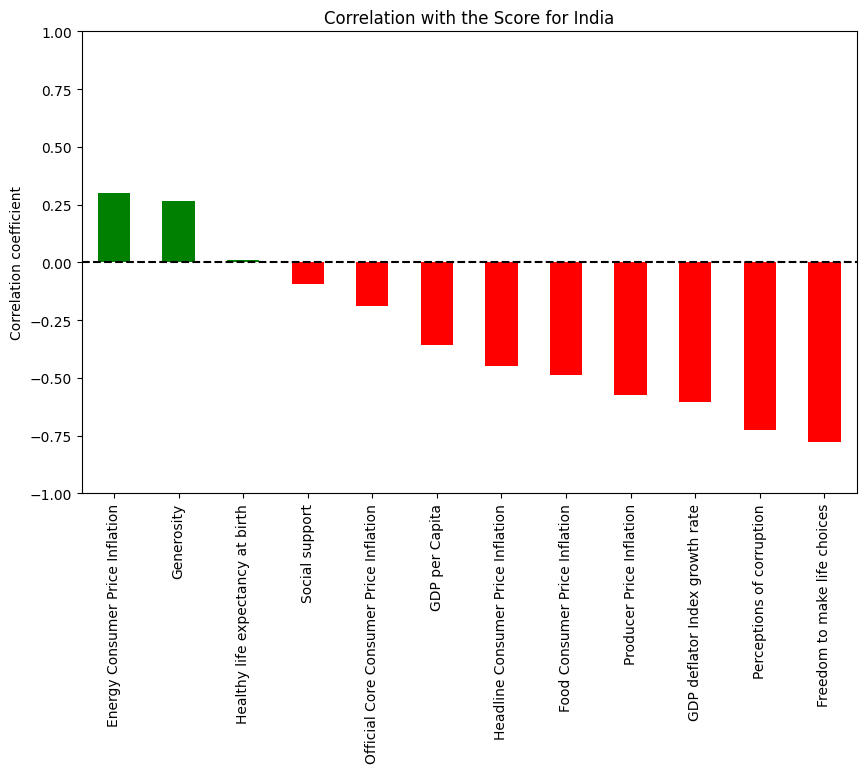

In [ ]:
India = ['India']
df_India = df[df['Country'].isin(India)].copy()

numerical_cols_selected = df_India.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Year' as it's temporal and not a typical numerical feature for correlation analysis
if 'Year' in numerical_cols_selected:
    numerical_cols_selected.remove('Year')

# Ensure 'Score' is the first element
if 'Score' in numerical_cols_selected:
    numerical_cols_selected.remove('Score')
    numerical_cols_selected.insert(0, 'Score')

corr_matrix_selected = df_India[numerical_cols_selected].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for India')
plt.show()

score_correlations_selected = corr_matrix_selected['Score'].drop('Score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
score_correlations_selected.plot(kind='bar', color=['green' if x > 0 else 'red' for x in score_correlations_selected])
plt.title("Correlation with the Score for India")
plt.ylabel("Correlation coefficient")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-1, 1)
plt.show()

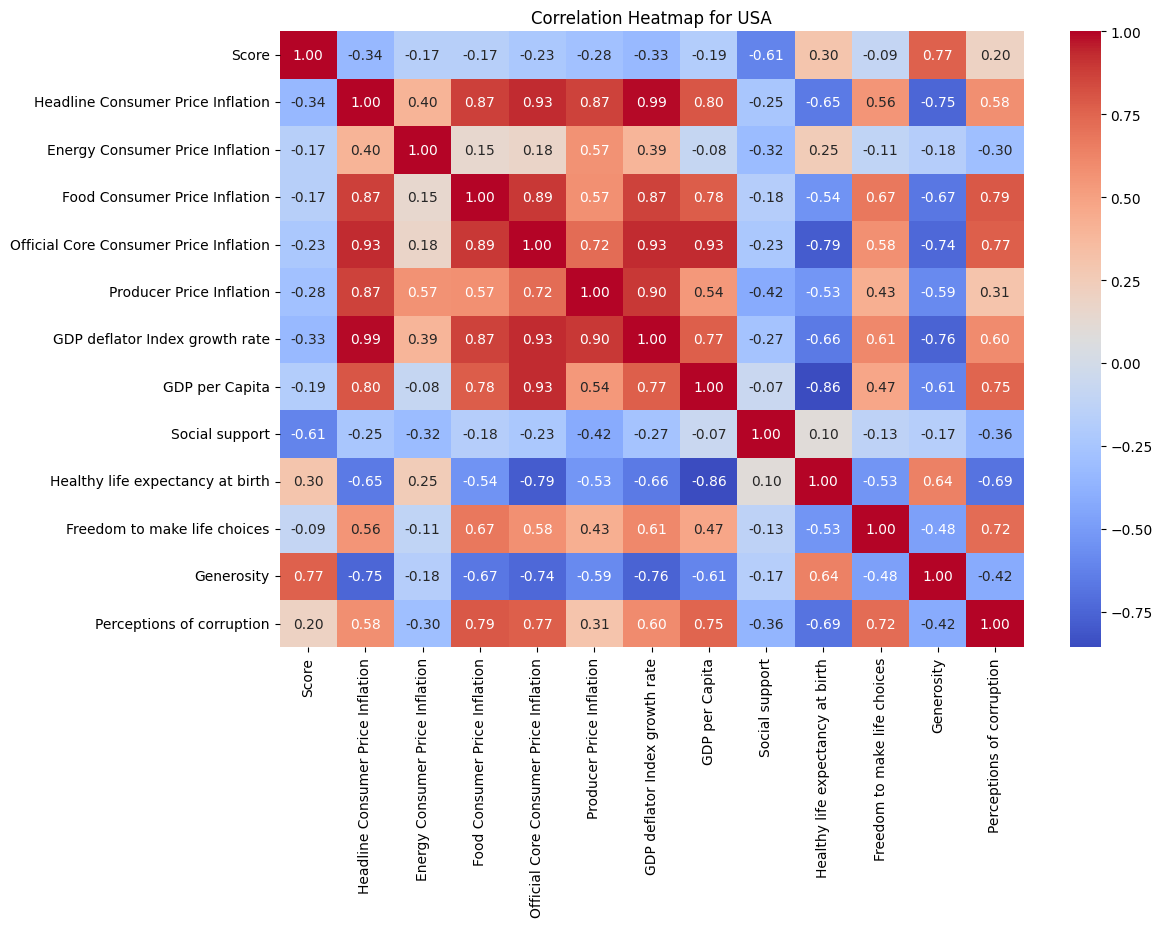

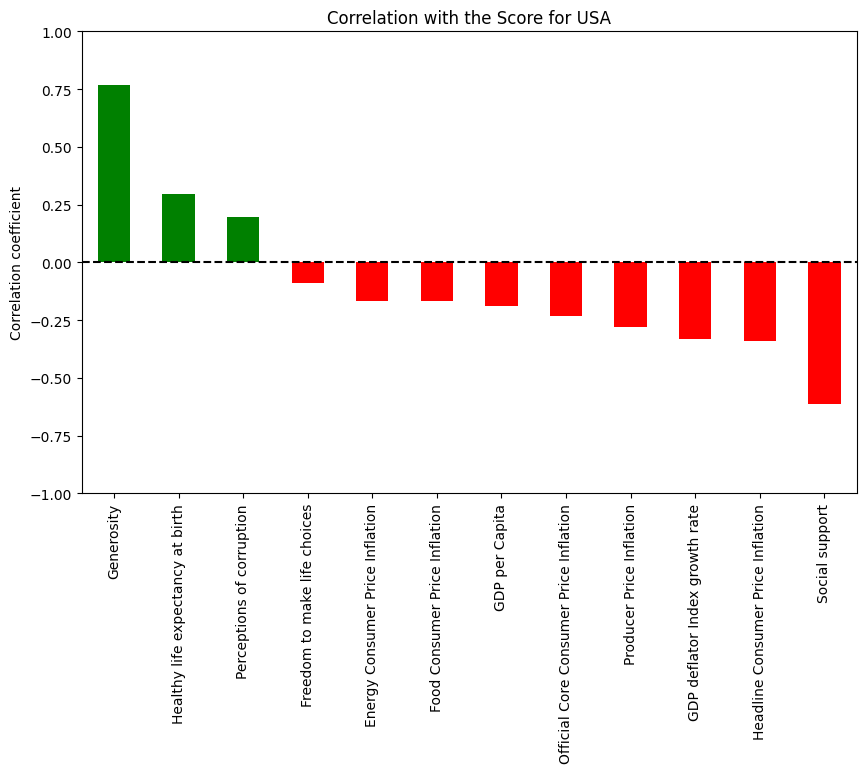

In [ ]:
USA = ['United States']
df_USA = df[df['Country'].isin(USA)].copy()

numerical_cols_selected = df_USA.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Year' as it's temporal and not a typical numerical feature for correlation analysis
if 'Year' in numerical_cols_selected:
    numerical_cols_selected.remove('Year')

# Ensure 'Score' is the first element
if 'Score' in numerical_cols_selected:
    numerical_cols_selected.remove('Score')
    numerical_cols_selected.insert(0, 'Score')

corr_matrix_selected = df_USA[numerical_cols_selected].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for USA')
plt.show()

score_correlations_selected = corr_matrix_selected['Score'].drop('Score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
score_correlations_selected.plot(kind='bar', color=['green' if x > 0 else 'red' for x in score_correlations_selected])
plt.title("Correlation with the Score for USA")
plt.ylabel("Correlation coefficient")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-1, 1)
plt.show()

| **Factor**                         | **USA** (Developed Economy)                                                               | **India** (Developing Economy)                                                       |
| ---------------------------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| **Generosity**                     | Strongly positive (\~0.76) → Major driver of happiness                                    | Positive (\~0.25) → Still important for community well-being                         |
| **Healthy life expectancy**        | Positive (\~0.3) → Longer lives = more happiness                                          | Weak/negative → Limited healthcare weakens effect                                    |
| **Perceptions of corruption**      | Slight positive (\~0.2) → Less corruption boosts trust                                    | Strong negative (\~ -0.7) → Corruption strongly reduces happiness                    |
| **Freedom to make life choices**   | Slight negative (\~ -0.1)                                                                 | Strong negative (\~ -0.7) → Lack of freedom causes unhappiness                       |
| **Social support**                 | Strong negative (\~ -0.6) → Possibly due to cultural independence                         | Weak/negative → Limited support systems weaken happiness                             |
| **GDP per capita**                 | Negative (\~ -0.2 to -0.3) → Fluctuations reduce happiness                                | Negative (\~ -0.4) → Growth not translating to well-being                            |
| **Inflation (energy, food, etc.)** | Negative across categories → Instability reduces happiness                                | Positive (energy inflation \~0.3) → Seen as development sign                         |
| **Overall trend**                  | Happiness depends more on **psychological & social factors** (generosity, health, trust). | Happiness depends more on **governance & fairness** (corruption, freedom, equality). |


**Top 10 countries**

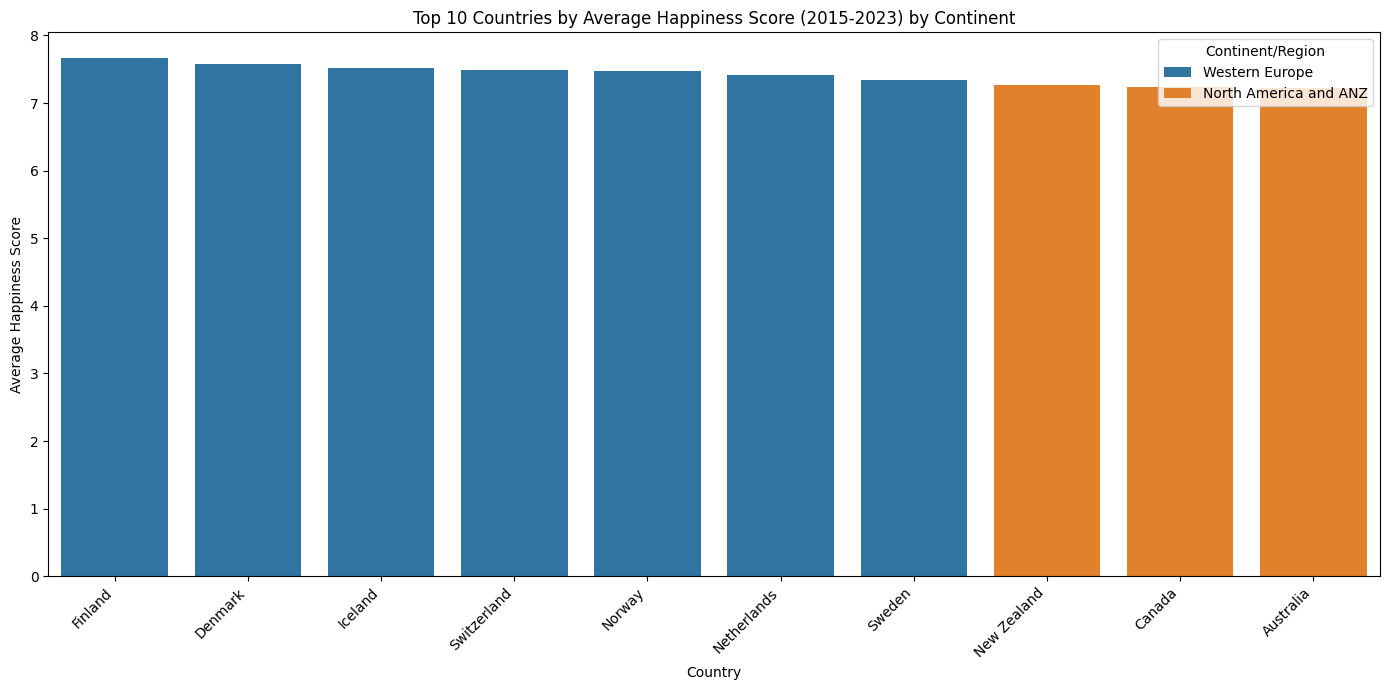

In [ ]:
# Calculate average happiness score per country and include Continent/Region
average_happiness_per_country_continent = df.groupby(['Country', 'Continent/Region'])['Score'].mean().reset_index()

# Get the top 10 countries based on average score (ignoring continent for ranking)
average_happiness_overall = df.groupby('Country')['Score'].mean().sort_values(ascending=False)
top_10_countries_list = average_happiness_overall.head(10).index.tolist()

# Filter the data to include only the top 10 countries and their continents
df_top_10_continent = average_happiness_per_country_continent[average_happiness_per_country_continent['Country'].isin(top_10_countries_list)]

# Sort the filtered data by average score to maintain the top 10 order in the plot
df_top_10_continent = df_top_10_continent.set_index('Country').loc[top_10_countries_list].reset_index()


plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Score', hue='Continent/Region', data=df_top_10_continent, dodge=False) # Use dodge=False to stack or place side-by-side if needed, but with one continent per country, it just colors
plt.title('Top 10 Countries by Average Happiness Score (2015-2023) by Continent')
plt.xlabel('Country')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

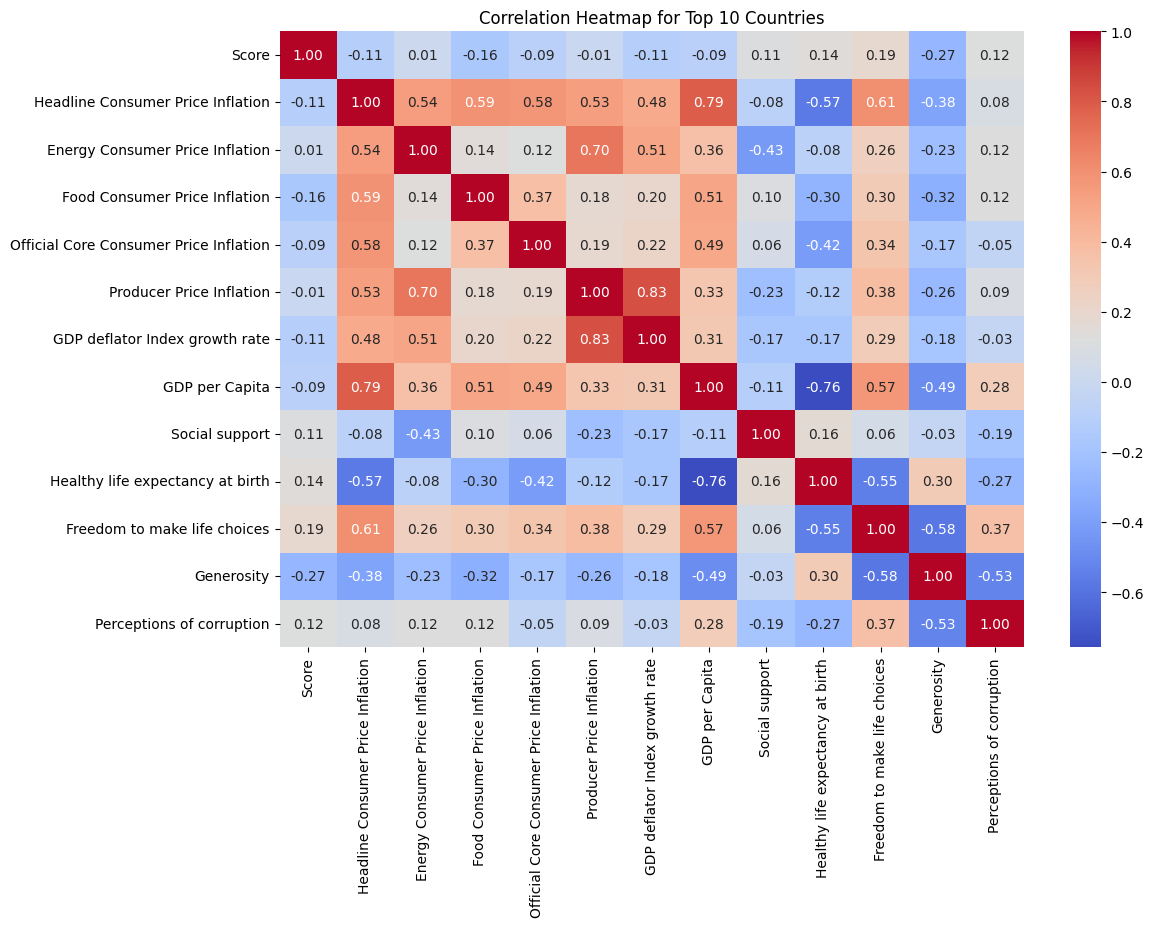

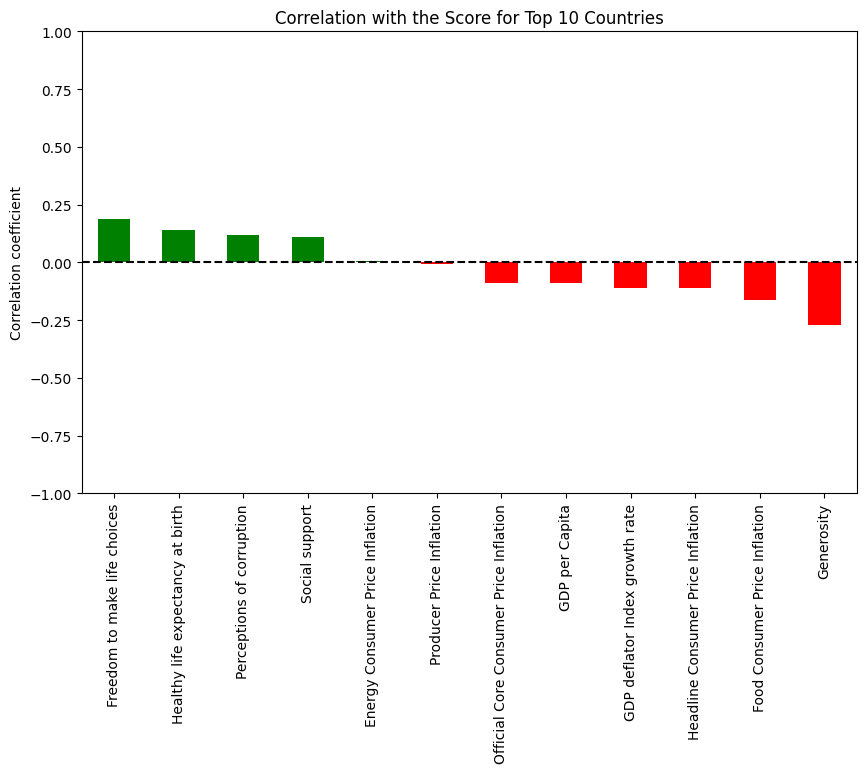

In [ ]:
average_happiness_overall = df.groupby('Country')['Score'].mean().sort_values(ascending=False)
top_10_countries = average_happiness_overall.head(10)

top_10_countries_list = top_10_countries.index.tolist()
df_top_10 = df[df['Country'].isin(top_10_countries_list)].copy()

numerical_cols_selected = df_top_10.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Year' as it's temporal and not a typical numerical feature for correlation analysis
if 'Year' in numerical_cols_selected:
    numerical_cols_selected.remove('Year')

# Ensure 'Score' is the first element
if 'Score' in numerical_cols_selected:
    numerical_cols_selected.remove('Score')
    numerical_cols_selected.insert(0, 'Score')

corr_matrix_selected = df_top_10[numerical_cols_selected].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Top 10 Countries')
plt.show()

score_correlations_selected = corr_matrix_selected['Score'].drop('Score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
score_correlations_selected.plot(kind='bar', color=['green' if x > 0 else 'red' for x in score_correlations_selected])
plt.title("Correlation with the Score for Top 10 Countries")
plt.ylabel("Correlation coefficient")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-1, 1)
plt.show()

Observations:

Western Europe dominates → ~65% of top 10 slots.

North America & ANZ (Australia, New Zealand, Canada) → ~35%.

Interpretation: Happiest nations are concentrated in developed Western regions with stable democracies, advanced economies, and high social trust.

Correlation with Happiness for Top 10 Countries

✅ Positive drivers of happiness

Freedom to make life choices (~0.2) → biggest factor.

Healthy life expectancy (~0.15) → strong healthcare systems matter.

Perceptions of corruption (~0.12) → low corruption builds trust.

Social support (~0.1) → community and welfare safety nets boost happiness.

❌ Negative pressures on happiness

Generosity (~ -0.25) → counterintuitive; may reflect lower emphasis on external giving since internal systems already ensure security.

Food, headline & core inflation (~ -0.1 to -0.15) → still matters, but impact is smaller compared to poorer nations.

GDP per capita (~ -0.1) → beyond a certain level, more wealth doesn’t increase happiness.

**Last 10 countries**

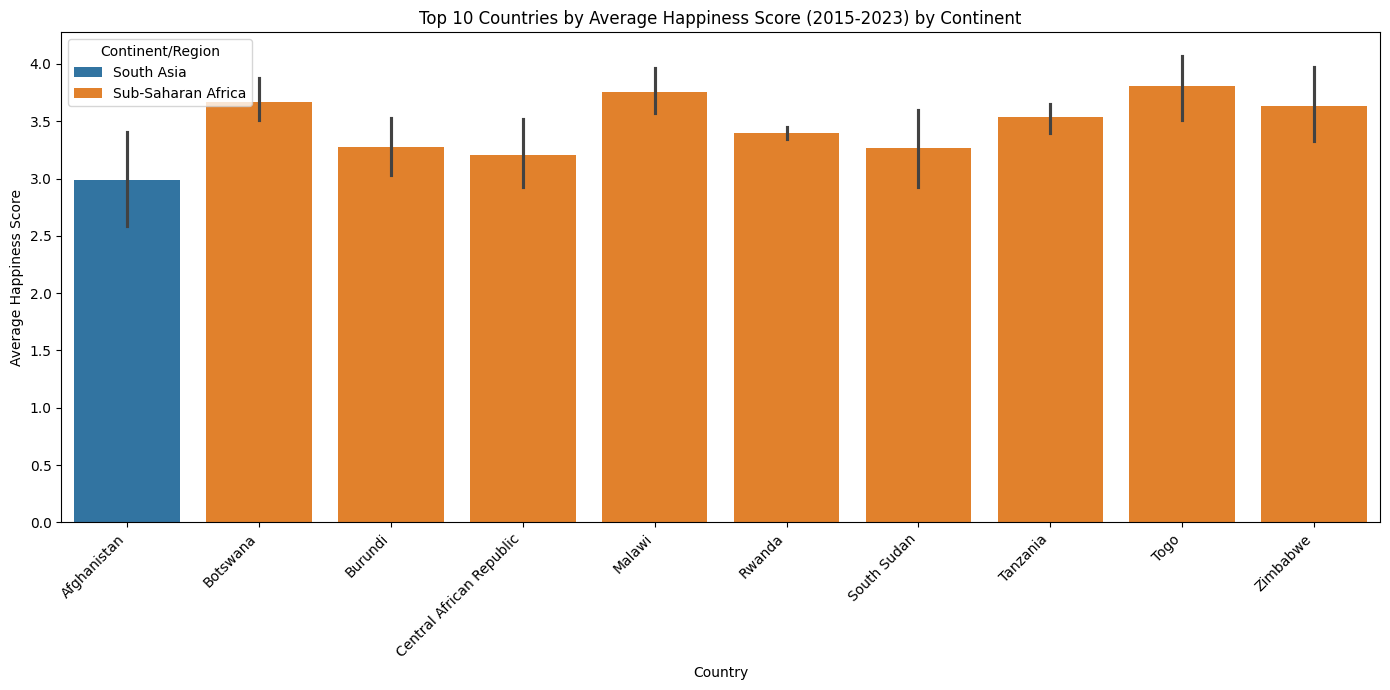

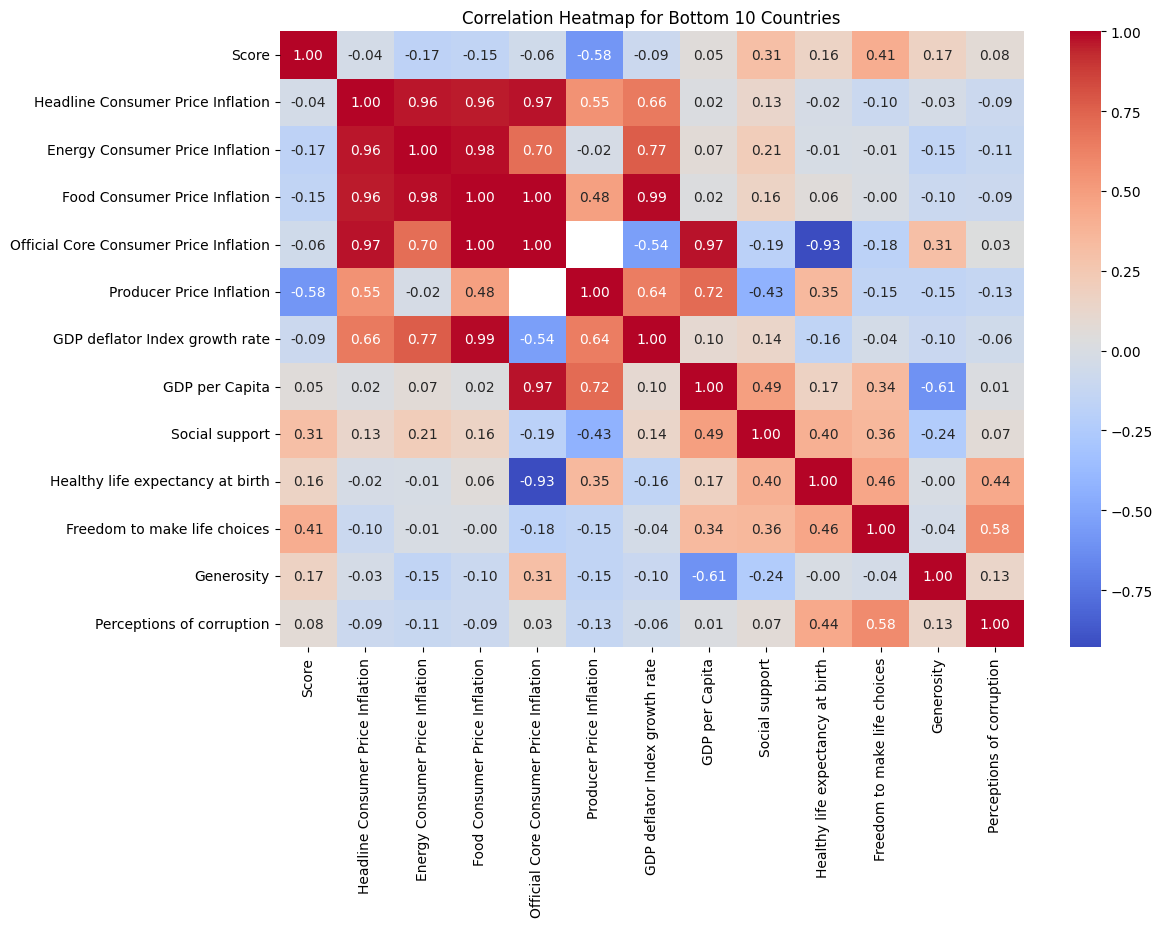

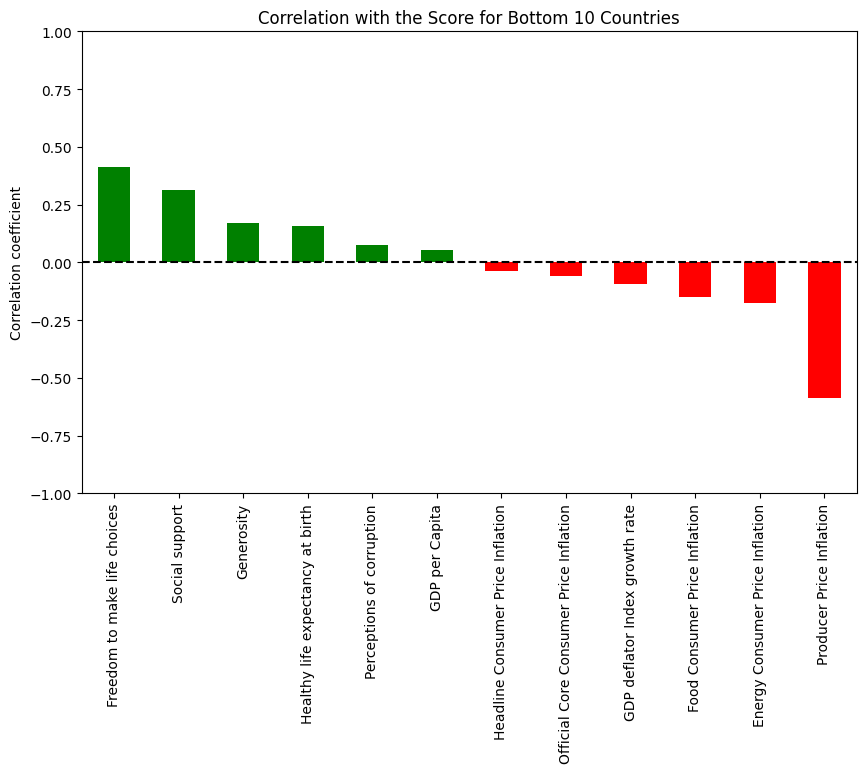

In [ ]:
average_happiness_per_country = df.groupby('Country')['Score'].mean().sort_values(ascending=True)

bottom_10_countries = average_happiness_per_country.head(10)
bottom_10_countries_list = bottom_10_countries.index.tolist()
df_bottom_10 = df[df['Country'].isin(bottom_10_countries_list)].copy()
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Score', hue='Continent/Region', data=df_bottom_10, dodge=False) # Use dodge=False to stack or place side-by-side if needed, but with one continent per country, it just colors
plt.title('Top 10 Countries by Average Happiness Score (2015-2023) by Continent')
plt.xlabel('Country')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

numerical_cols_selected = df_bottom_10.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Year' as it's temporal and not a typical numerical feature for correlation analysis
if 'Year' in numerical_cols_selected:
    numerical_cols_selected.remove('Year')

# Ensure 'Score' is the first element
if 'Score' in numerical_cols_selected:
    numerical_cols_selected.remove('Score')
    numerical_cols_selected.insert(0, 'Score')

corr_matrix_selected = df_bottom_10[numerical_cols_selected].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Bottom 10 Countries')
plt.show()

score_correlations_selected = corr_matrix_selected['Score'].drop('Score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
score_correlations_selected.plot(kind='bar', color=['green' if x > 0 else 'red' for x in score_correlations_selected])
plt.title("Correlation with the Score for Bottom 10 Countries")
plt.ylabel("Correlation coefficient")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-1, 1)
plt.show()

Observations:
Sub-Saharan Africa → majority (~70%) of bottom 10 cases.

South Asia → only Afghanistan

Extreme unhappiness is concentrated in Sub-Saharan Africa due to poverty, inequality, weak institutions, and poor infrastructure.

Correlation with Happiness (Bottom 10 Countries)

✅ Positive drivers of happiness

Freedom to make life choices (~0.4, strongest).

Social support (~0.3).

Generosity (~0.18).

Healthy life expectancy (~0.15).

❌ Negative pressures on happiness

Producer price inflation (~ -0.55, strongest negative).

Energy & food price inflation (~ -0.2 to -0.3).

GDP deflator & core inflation (~ -0.1).

GDP per capita → slightly negative (growth benefits not reaching people).

Conclusion:

Global Trends

Overall happiness scores showed a gradual upward trend, with a dip in 2017 but resilience during the pandemic years (2020–2021).

Social trust and solidarity likely buffered the negative effects of COVID-19.

Strongest Positive Correlations with Happiness

GDP per capita (0.74) → Economic prosperity is strongly linked with happiness.

Healthy life expectancy (0.70) → Better health outcomes raise well-being.

Freedom to make life choices (0.57) and low corruption (0.44) → Governance and individual freedom are critical.

Negative Correlations

Inflation measures (–0.20 to –0.22) and GDP deflator growth are associated with lower happiness, highlighting how economic instability harms well-being.

Regional Differences

Top 10 happiest nations: Concentrated in Western Europe, North America, and Oceania — driven by strong healthcare, freedom, low corruption, and social trust.

Bottom 10 nations: Mostly Sub-Saharan Africa, plus Afghanistan — unhappiness stems from poverty, inflation, weak institutions, and unmet basic needs.

Country-specific insights

USA: Happiness relies more on social and psychological factors (generosity, trust, health).

India: Happiness depends more on governance and fairness (low corruption, personal freedom).